In [1]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,342 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,693 kB]
Get:14 http://ar

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-17 17:06:16--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  99.8KB/s    in 44m 26s 

2023-05-17 17:50:43 (99.9 KB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [5]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [6]:
!pip install -q findspark

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [8]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
combined_data = spark.read.csv("/content/drive/MyDrive/Big Data_assessment/combined-data.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()


import sys, os

sys.path
sys.executable

In [4]:
# UNZIPPING THE DATASET FILES


!unzip "/content/chat-data.zip"
!unzip "/content/flamingo-data.zip"



unzip:  cannot find or open /content/chat-data.zip, /content/chat-data.zip.zip or /content/chat-data.zip.ZIP.
unzip:  cannot find or open /content/flamingo-data.zip, /content/flamingo-data.zip.zip or /content/flamingo-data.zip.ZIP.


In [ ]:
combined_data

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string]

In [ ]:
combined_data.limit(3).toPandas()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7
0,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
1,812,5648,1,android,69,8,NULL,NULL
2,1658,5649,1,iphone,31,5,NULL,NULL


In [ ]:
df=combined_data.toPandas()

In [ ]:
df=df.rename(columns={'_c4':'count_gameclicks',
                      '_c0':'userId',
                      '_c1':'userSessionId',
                      '_c2':'teamLevel',
                      '_c3':'platformType',
                      '_c5':'count_hits',
                      '_c6':'count_buyId',
                      '_c7':'avg_price'})

In [ ]:
df=df.iloc[1:]

In [ ]:
df.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
1,812,5648,1,android,69,8,NULL,NULL
2,1658,5649,1,iphone,31,5,NULL,NULL
3,1589,5650,1,iphone,26,2,NULL,NULL
4,1863,5651,1,android,35,4,NULL,NULL
5,937,5652,1,android,39,0,1,1.00


In [ ]:
df.tail()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4615,1399,37261,6,mac,28,3,1,2.00
4616,248,37491,3,iphone,108,11,2,10.00
4617,981,38321,6,iphone,36,9,1,10.00
4618,1575,38602,3,android,11,0,NULL,NULL
4619,424,38722,5,android,33,3,NULL,NULL


In [ ]:
df.convert_dtypes({'count_gameclicks': 'int32','count_hits':'int32'})

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
1,812,5648,1,android,69,8,NULL,NULL
2,1658,5649,1,iphone,31,5,NULL,NULL
3,1589,5650,1,iphone,26,2,NULL,NULL
4,1863,5651,1,android,35,4,NULL,NULL
5,937,5652,1,android,39,0,1,1.00
...,...,...,...,...,...,...,...,...
4615,1399,37261,6,mac,28,3,1,2.00
4616,248,37491,3,iphone,108,11,2,10.00
4617,981,38321,6,iphone,36,9,1,10.00
4618,1575,38602,3,android,11,0,NULL,NULL


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

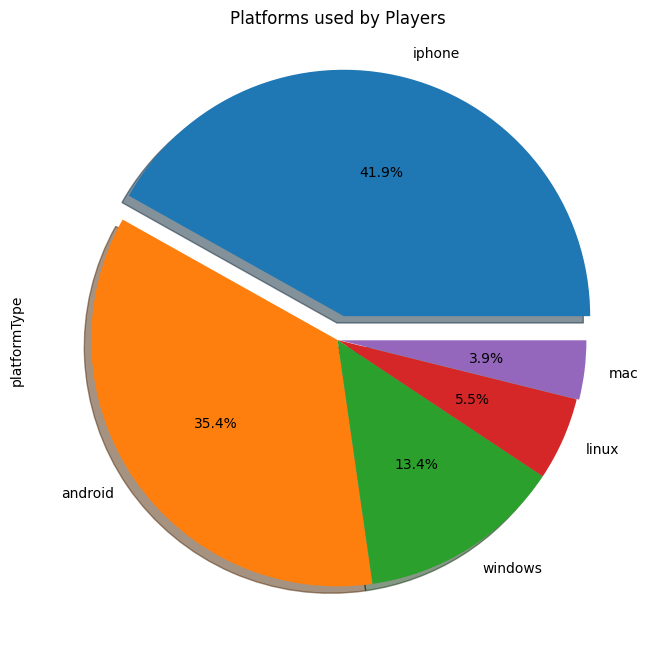

In [ ]:
pla = df['platformType'].value_counts().sort_values(ascending=False)
explode = (0.1, 0, 0, 0,0.01) 
plt.figure(figsize=(8,8))
pla[0:5].plot(kind = 'pie', title = 'Platforms used by Players', autopct='%1.1f%%',shadow=True,explode = explode)
plt.show()

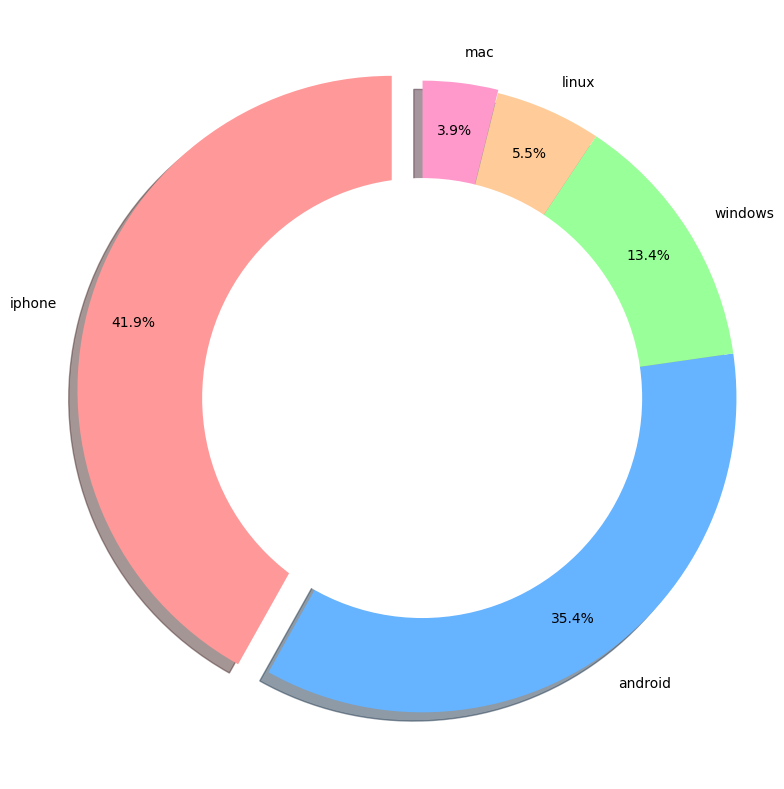

In [ ]:
import matplotlib.pyplot as plt

# Get the platformType value counts from the DataFrame
pla = df['platformType'].value_counts().sort_values(ascending=False)

# Define the labels and sizes using the values from pla
labels = pla.index.tolist()[:5]
sizes = pla.values.tolist()[:5]

# Define the colors, explode, and other settings
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = (0.1, 0, 0, 0, 0.01)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, startangle=90, pctdistance=0.85)

# Draw the circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the aspect ratio and adjust layout
plt.axis('equal')
plt.tight_layout()

# Display the chart
plt.show()


<Axes: xlabel='count_gameclicks', ylabel='count_hits'>

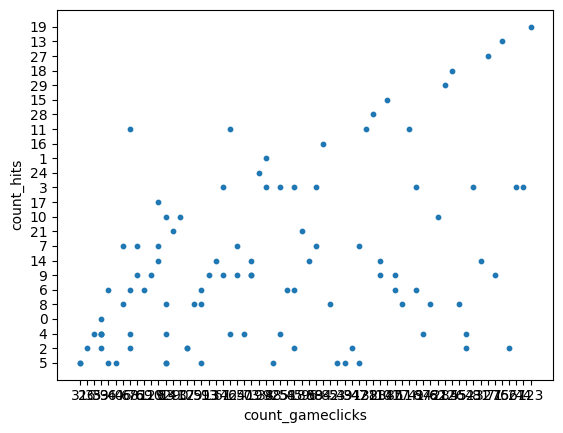

In [ ]:
df[1:100].plot.scatter(x='count_gameclicks', y='count_hits', s=10)

In [ ]:
df['count_gameclicks'] = df['count_gameclicks'].astype(str).astype(int)
df['count_hits'] = df['count_hits'].astype(str).astype(int)

In [ ]:
df.dtypes

userId              object
userSessionId       object
teamLevel           object
platformType        object
count_gameclicks     int64
count_hits           int64
count_buyId         object
avg_price           object
dtype: object

In [ ]:
df['ratio']=df['count_hits'] / df['count_gameclicks']

In [ ]:
df1 = df.sort_values('count_hits',ascending = False).groupby('userId').head(10)

In [ ]:
df1[1:10]

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,ratio
4331,229,29719,4,mac,928,104,NULL,NULL,0.112069
1179,1418,11084,3,linux,970,100,NULL,NULL,0.103093
3430,229,25701,3,mac,1029,100,NULL,NULL,0.097182
1178,436,11083,3,android,833,100,NULL,NULL,0.120048
2502,1477,19696,3,iphone,925,100,2,15.00,0.108108
4487,1216,32294,3,iphone,897,100,NULL,NULL,0.111483
3124,10,21397,3,linux,832,100,NULL,NULL,0.120192
3283,2356,23644,5,android,752,99,1,3.00,0.131649
1749,399,14737,3,android,965,99,1,1.00,0.102591
